## Programming Exercise 2: Logistic Regression
#### Author - Rishabh Jain

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

### 1&nbsp;&nbsp;&nbsp;&nbsp;Logistic Regression

##### Problem Statement
In this part of the exercise, we will build a logistic regression model to predict whether the student gets admitted into a university.  

Suppose that we are the adminstrator of a department and want to determine each applicant's chance of admission based on their results in two exams. We have hisotrical data from previous applicants that we can use as a training set for logistic regression. For each applicant, we have their scores in two exams and their admission decision.

Our task is to build a classification model that estimates an applicant's probability of admission based on the score from those two exams.

In [2]:
data=pd.read_csv('./ex2data1.csv')
print(f'TRAINING DATASET SHAPE : {data.shape[0]} X {data.shape[1]}')
data.sample(5)

TRAINING DATASET SHAPE : 100 X 3


,exam1,exam2,decision
3,60.182599,86.308552,1
37,64.176989,80.908061,1
79,82.226662,42.719879,0
85,68.468522,85.594307,1
64,44.668262,66.450086,0


#### 1.1&nbsp;&nbsp;&nbsp;&nbsp;Visualizing the data
Before starting to implement any learning algorithms, it is always good to visualize the data if possible.

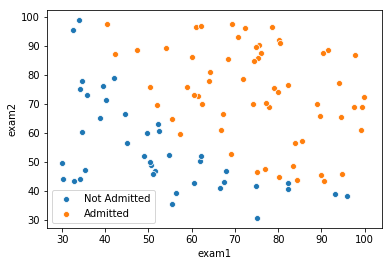

In [3]:
sns.scatterplot(x='exam1',y='exam2',data=data[data['decision']==0],label='Not Admitted');
sns.scatterplot(x='exam1',y='exam2',data=data[data['decision']==1],label='Admitted');

#### 1.2&nbsp;&nbsp;&nbsp;&nbsp;Implementation
We will add another dimension to the Design Matrix to accomodate the $\theta_0$ intercept term. We will also initialize the fitting parameters to 0.

In [4]:
m=data.shape[0]
X=np.ones(shape=(m,3))
X[:,1:]=data.values[:,:2]
print(f'X : {X.shape}')

y=data.values[:,2]
y=y[:,np.newaxis]
print(f'y : {y.shape}')

theta=np.zeros(shape=(1,X.shape[1]))
print(f'theta : {theta.shape}')

X : (100, 3)
y : (100, 1)
theta : (1, 3)


##### 1.2.1&nbsp;&nbsp;&nbsp;&nbsp;Sigmoid/Logistic Function

Before starting with the implementation, let's try to understand the sigmoid function.  
For large positive values of $x$, sigmoid function is close to 1, while for large negative values, sigmoid function is close to 0. And sigmoid of 0 is exactly 0.5 .

$$ \sigma(x)=\frac{1}{1+e^{-x}} $$

In [5]:
def sigmoid(z):
    sigma=1/(1+np.exp(-z))
    return sigma

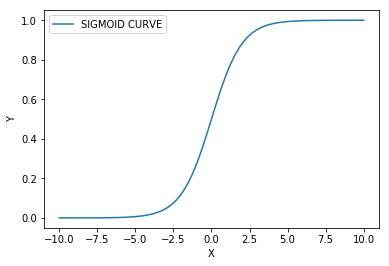

In [6]:
df=pd.DataFrame({'X':np.linspace(-10,10,100)})
df['Y']=sigmoid(df['X'])
sns.lineplot(x='X',y='Y',data=df,label='SIGMOID CURVE');

###### Model Representation

The hypothesis in Linear Regression (i.e. $h_\theta(x)=\theta^Tx$) cannot be used for the classification problems because the linear hypothesis output ranges from $-\infty$ to $\infty$, whereas $y$ (i.e. target variable) in classification problems are either 0 or 1. Hence the range of hypothesis output in Logistic Regression should be:

$$ 0\le h_\theta(x) \le 1 $$

In order to keep $h_\theta(x)$ in the range mentioned above, Sigmoid Function comes to rescue:

$$ h_\theta(x)=g(\theta^Tx) $$
$$ g(z)=\frac{1}{1+e^{-z}} $$



In [7]:
def predict(X,theta):
    '''Predicts by applying logistic function on linear model'''
    z=np.dot(X,theta.T)
    h=sigmoid(z)
    return h

##### 1.2.2&nbsp;&nbsp;&nbsp;&nbsp;Cost function
We learnt about the cost function $J(\theta)$ in **Linear Regression**, the cost function represents the optimization objective i.e. we create a cost function and minimize it to develope an accurate model with minimum error.
$$ J(\theta)=\frac{1}{2m}\sum_{i=0}^m(h_\theta(x^{(i)})-y^{(i)})^2 $$  
On replacing $h_\theta(x)$ with $\frac{1}{1+e^{(-\theta^Tx)}}$ in the above equation,it becomes '**Non Convex**' which does not guarrante to converge and find the global minimum. So we need a new cost function for Logistic Regression.  

<img src='https://d3ansictanv2wj.cloudfront.net/convex-non-convex-9c8cb9320d4b0392c5f67004e8832e85.jpg' width='500'>

The figure in left is a '**Convex**' function and has only one minimum called global minimum and will always converage whereas the figure in right is a '**Non Convex**' function and has mutiple minimums also called local minimums. And there is no guarrante that the non convex function will always converge.

For **Logistic Regression** cost function is defined as:  

$$\begin{equation}
  Cost(h_\theta(x),y)=\begin{cases}
    -log(h_\theta(x)) & \text{if }y=1 \\
    -log(1-h_\theta(x)) & \text{if }y=0
  \end{cases}
\end{equation}$$

Let's try to understand the cost function.  

For $y=1$
- $J(\theta)\approx\infty$ if $h_\theta(x)\approx0$ (Penalty for wrong prediction)
- $J(\theta)\approx0$ if $h_\theta(x)\approx1$  

For $y=0$
- $J(\theta)\approx\infty$ if $h_\theta(x)\approx1$ (Penalty for wrong prediction)
- $J(\theta)\approx0$ if $h_\theta(x)\approx0$  

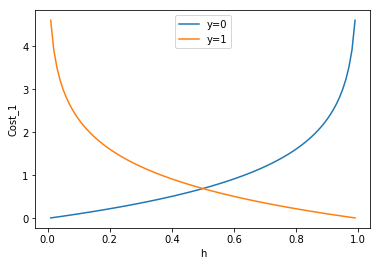

In [8]:
# In Logistic Regression, 0<h(x)<1 
df=pd.DataFrame({'h':np.linspace(0.01,0.99,100)})
df['Cost_1']=-np.log(df['h'])
df['Cost_0']=-np.log(1-df['h'])
sns.lineplot(x='h',y='Cost_0',data=df,label='y=0');
sns.lineplot(x='h',y='Cost_1',data=df,label='y=1');

From the above graph and the set of equations, we can see that this new cost function captures the intuition of penalizing the learning algorithm by a very large cost if predictions are not even remotely close. Combinig both the equations, **Cost function of Logistic Regression** also called **Cross Entropy function** looks like this:

$$ J(\theta)= \frac{-1}{m}\sum_{i=0}^m[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)})]$$

In [9]:
def computeCost(h,y):
    '''Computes the cost using Cross Entropy function'''
    m=y.shape[0]
    J=(-1/m)*np.sum(np.multiply(y,np.log(h))+np.multiply(1-y,np.log(1-h)))
    return J

In [10]:
h=predict(X,theta)
computeCost(h,y)

0.6931471805599453

##### 1.2.3&nbsp;&nbsp;&nbsp;&nbsp;Learning Parameters

**Gradient Descent Optimization** :
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) $$

**Lets calculate the $\frac{\partial}{\partial \theta_j}J(\theta)$ for Logistic Regression cost function.**  

$ log(h_\theta(x))=log(\frac{1}{1+e^{-\theta^Tx}})=-log(1+e^{-\theta^Tx})\;\;\;\;\; (1) $  
$ log(1-h_\theta(x))=log(1-\frac{1}{1+e^{-\theta^Tx}})=log(\frac{e^{-\theta^Tx}}{1+e^{-\theta^Tx}})=log(e^{-\theta^Tx})-log(\frac{1}{1+e^{-\theta^Tx}})=-\theta^Tx-log(1+e^{-\theta^Tx})\;\;\;\;\; (2) $

Replacing $(1)$ and $(2)$ in $J(\theta)$,

$ J(\theta)=\frac{-1}{m}\sum_{i=0}^m[-y^i(log(1+e^{(-\theta^Tx^i)}))+(1-y^i)(-\theta^Tx^i-log(1+e^{-\theta^Tx^i}))] $

$ \;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[-y^ilog(1+e^{-\theta^Tx^i})-\theta^Tx^i-log(1+e^{-\theta^Tx^i})+y^i\theta^Tx^i+y^ilog(1+e^{-\theta^Tx^i})] $

$ \;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^i\theta^Tx^i-(log(e^{\theta^Tx^i})+log(1+e^{-\theta^Tx^i}))]\;\;\;\;\;(using\; m=log(e^m)) $

$ \;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^i\theta^Tx^i-log(1+e^{\theta^Tx^i})]\;\;\;\;\;(using\; log(m)+log(n)=log(mn)) $

$ \frac{\partial}{\partial \theta}(J(\theta))=\frac{-1}{m}\sum_{i=0}^m[\frac{\partial}{\partial \theta}(y^i\theta^Tx^i)-\frac{\partial}{\partial \theta}(log(1+e^{\theta^Tx^i}))] $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^ix^i-\frac{1.e^{\theta^Tx^i}.x^i}{1+e^{\theta^Tx^i}}]\;\;\;\;\;(using\;\frac{d}{dx}(uv)=u.\frac{dv}{dx}+v.\frac{du}{dx}) $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^ix^i-\frac{x^i}{\frac{1+e^{\theta^Tx^i}}{e^{\theta^Tx^i}}}] $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^ix^i-\frac{x^i}{1+e^{-\theta^Tx^i}}] $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{m}\sum_{i=0}^m(h_\theta(x^i)-y^i)x^i\;\;\;\;\; (3) $

Replacing $(3)$ in update rule:

$$ \theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=0}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$

As we can see that the Gradient Descent update rule remains the same even though the underlying cost function has changed.

In [11]:
def gradientDescent(X,y,theta,alpha,iterations):
    '''Minimizes the cost function using Gradient Descent Optimization Algorithm'''
    m=X.shape[0]
    jHistory=[]
    for i in range(iterations):
        h=predict(X,theta)
        # Computing cost
        J=computeCost(h,y)
        jHistory.append(J)
        # Parameters update rule
        gradient=(alpha/m)*np.dot((h-y).T,X)
        theta=theta-gradient
    return (theta,jHistory)

In [12]:
def featureNormalize(X):
    '''Normalizes the Design Matrix assuming the first column is filled with ones for intrecept term.'''
    X[:,1:]=(X[:,1:]-X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)
    return X

**Normalizing the features before training the model is important as it speeds up the optimization.**

In [13]:
X=featureNormalize(X)
X[:10,:]

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853]])

FINAL COST : 0.2036


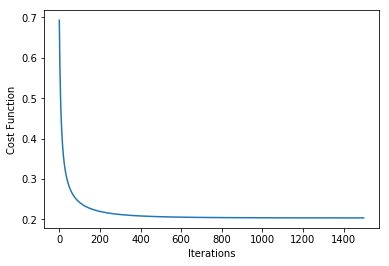

In [14]:
alpha=0.3
iterations=1500

theta,jHistory=gradientDescent(X,y,theta,alpha,iterations)
df=pd.DataFrame({'Iterations':range(iterations),'Cost Function':jHistory})
print('FINAL COST : %.4f'%jHistory[iterations-1])
sns.lineplot(data=df,x='Iterations',y='Cost Function');

**Plotting Decision Boundary**  
A decision boundary is hypersurface that partitions the underlying vector into two sets or classes.

Genral Equation of Line : 
$$ ax+by=c $$
$$ \theta_1x_1+\theta_2x_2=-\theta_0 $$  
$$ x_2=(\frac{-1}{\theta_2})(\theta_0+\theta_1x_1)$$

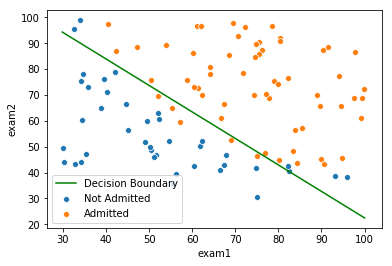

In [15]:
sns.scatterplot(x='exam1',y='exam2',data=data[data['decision']==0],label='Not Admitted');
sns.scatterplot(x='exam1',y='exam2',data=data[data['decision']==1],label='Admitted');
# Only need two points to define a line, so choose two endpoints
x1=np.array([min(X[:,1]),max(X[:,1])])
x2=np.multiply((-1/theta[0][2]),(theta[0][0]+np.multiply(theta[0][1],x1)))
# De-normalizing the data
x1=x1*data['exam1'].std()+data['exam1'].mean()
x2=x2*data['exam2'].std()+data['exam2'].mean()
sns.lineplot(x=x1,y=x2,label='Decision Boundary',color='green');

##### 1.2.4&nbsp;&nbsp;&nbsp;&nbsp;Evaluating Logistic Regression

In [16]:
h=predict(X,theta).reshape(m)
result=pd.DataFrame({'actual':data['decision'],'prediction':h})
result.sample(10)

,actual,prediction
64,0,0.075530
73,1,0.878757
63,0,0.000157
10,0,0.905205
49,1,0.999988
21,1,0.998391
40,1,0.967775
38,0,0.209379
99,1,0.999695
6,1,0.998787


Calculating the admission probability of student with Exam 1 score of 45 and Exam 2 score of 85.

In [17]:
x=[1,45,85]
# Normalizing the data
x[1]=(x[1]-data['exam1'].mean())/data['exam1'].std()
x[2]=(x[2]-data['exam2'].mean())/data['exam2'].std()
print('ADMISSION PROBABILITY : %.3f'%predict(x,theta)[0])

ADMISSION PROBABILITY : 0.770


Calculating the training accuracy.

In [18]:
p=np.round(h).reshape(m,1)
accuracy=np.mean(y==p)*100
print(f'TRAINING ACCURACY : {accuracy}%')

TRAINING ACCURACY : 89.0%


### 2&nbsp;&nbsp;&nbsp;&nbsp;Regularized Logistic Regression

##### Problem Statement
In this part of the exercise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA,e ach microchip goes through various tests to ensure it is functioning correctly.

Suppose we are the product manager of the factory and we have the rest results for some microchips on two different tests. From these two tests, we would like to determine whether the microchips should be accepted or rejected. To help us make a decision, we have a dataset of test results on past microchips, from which we can build a logistic regression model.

In [19]:
data=pd.read_csv('./ex2data2.csv')
print(f'TRAINING DATASET SHAPE : {data.shape[0]} X {data.shape[1]}')
data.sample(5)

TRAINING DATASET SHAPE : 118 X 3


,test1,test2,result
114,-0.593890,0.49488,0
16,0.166470,0.53874,1
92,0.103110,0.77997,0
38,0.062788,-0.16301,1
79,0.085829,-0.75512,0


#### 2.1&nbsp;&nbsp;&nbsp;&nbsp;Visualizing the data

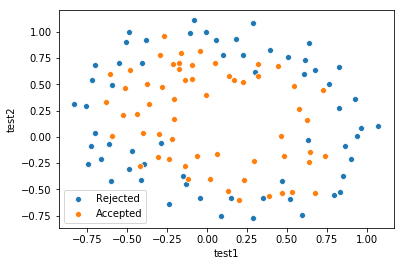

In [20]:
sns.scatterplot(x='test1',y='test2',data=data[data['result']==0],label='Rejected');
sns.scatterplot(x='test1',y='test2',data=data[data['result']==1],label='Accepted');

Figure above shows that our dataset cannot be separated into two different classes by a straight line. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

#### 2.2&nbsp;&nbsp;&nbsp;&nbsp;Feature Mapping

One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of $x_1$ and $x_2$ up to $n^{th}$ power. As a result of this mapping, our vector of two features will be transformed into higher-dimensional feature vector. A logistic regression classifier trained on higher-dimension feature vector will have a more complex decision boundary and will appear non-linear.  

While the feature mapping allows us to build a more expressive classifier and  helps us solve the **Underfitting** problem, it is also more susceptible to **Overfitting** problem.

From $[x_1,x_2]$ features to $[1,x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3...x_2^n]$ features.

In [21]:
def mapFeature(x1,x2,degree):
    result=np.ones(shape=(x1.shape[0],1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            column=np.multiply(np.power(x1,i-j),np.power(x2,j))
            result=np.column_stack((result,column))
    return result

#### 2.3&nbsp;&nbsp;&nbsp;&nbsp;Cost Function and Gradient

In this part of the exercise, we will implement the **regularized** logistic regression to fit the data and also see for ourselves how parameters regularization can help combat the overfitting problem.

<img src="https://i.stack.imgur.com/t0zit.png" width="500">  
If we have too many features, the learned hypothesis will have large parameters and fit the training set very well such that $J(\theta)\approx0$, but fail to generalize new examples. What are our options available?
1. Reduce the number of features. (we will be throwing away the important information here.)
2. **Regularization** - this process keeps all the features and adds a penalty to the **RSS (Sum of squared residuals)** to reduce the freedom of the model. Hence, the model will less likely to fit the noise of the training data and will improve the generalization abilities of the model. In layman terms, regularization tries to prevent the parameters from growing larger.

##### Types of Regularization
1. **L1 Regularization (used in Lasso Regression)**  
LASSO stands for Least Absolute Shrinkage and Selection Operator.  
This regularization will shrink some parameters to **Zero**. Hence, this type of regularization can also help in **Feature Selection** in the model. As $\lambda$ grows bigger, more shrinkage in parameters will occur.
$$ J(\theta)=RSS+\lambda \sum_{j=1}^n|\theta_j| $$   
2. **L2 Regularization (used in Ridge Regression)**  
Parameters decrease progressively as $\lambda$ grows larger, **but are never cut to zero.**
$$ J(\theta)=RSS+\lambda \sum_{j=1}^n(\theta_j^2) $$ 
3. **L1/L2 Regularization (used in Elastic Net Regression)**  
Elastic-net is a mix of both L1 and L2 regularization. Lambda is a shared penalization parameter while alpha sets the ratio between L1 and L2 regularization in the Elastic Net Regularization.
$$ J(\theta)=RSS+\lambda[(1-\alpha)\sum_{j=1}^n(\theta_j^2)+\alpha\sum_{j=1}^n|\theta_j|]$$ 

##### Geometric Perspective on Regularization
Lasso, Ridge and Elastic-Net regularization can also be viewed as a **constraint** added to **optimization** process. Lasso error minimization can be written as :
$$ minimize(RSS)\;\;\;\;subject\;to\; \sum_{j=1}^n|\theta_j|<t$$
Ridge error minimization can be written as :
$$ minimize(RSS)\;\;\;\;subject\;to\; \sum_{j=1}^n(\theta_j)^2<t$$

<img src="https://cdn-images-1.medium.com/max/1500/1*lFnKhQwmxt8XvP4wTYYJbw.png" width="600">

For the L1 regularization, the constraint region ($|\theta_1|+|\theta_2|<t$) is a diamond, this means that the loss function(RSS) contours has some chances of touching the corners of diamond at $\beta_1$ or $\beta_2$ axis, **setting some of the lasso coeffcients to zero**. While for the L2 regularization the constraint reigon ($\theta_1^2+\theta_2^2<t$) is a circle, thus it has no corners and the coefficients can not be equal to zero.

**Regularized Cost Function :**
$$ J(\theta)= \frac{-1}{m}\sum_{i=0}^m[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)})]+\frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$  
**Regularized Gradient Descent :**
$$ \theta_j:=\theta_j-\frac{\alpha}{m}(\sum_{i=0}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})\;\;\text{ , for}\;j=0 $$

$$ \theta_j:=\theta_j-\frac{\alpha}{m}(\sum_{i=0}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}+\lambda\theta_j)\;\;\text{ , for}\;j\neq0 $$


##### 2.3.1&nbsp;&nbsp;&nbsp;&nbsp;Learning Parameters

In [22]:
def regularizedGradientDescent(X,y,theta,alpha,lmbda,iterations):
    '''Minimizes the cost function using Gradient Descent Optimization Algorithm'''
    m=X.shape[0]
    jHistory=[]
    for i in range(iterations):
        h=predict(X,theta)
        # Computing cost
        J=computeCost(h,y)
        # Adding the regularized term
        J=J+(lmbda/(2*m))*np.sum(np.power(theta[:,1:],2))
        jHistory.append(J)
        # Parameters update rule
        gradient=(alpha/m)*(np.dot((h-y).T,X))
        # Adding the regularized term
        gradient=gradient+(alpha/m)*lmbda*np.column_stack((np.zeros((1,1)),theta[:,1:]))
        theta=theta-gradient
    return (theta,jHistory)

#### 2.4&nbsp;&nbsp;&nbsp;&nbsp;Plotting the decision boundary

In [23]:
def plotDecisionBoundary(theta,data,y,axis):
    sns.scatterplot(x='test1',y='test2',data=data[data['result']==0],label='Rejected',ax=axis);
    sns.scatterplot(x='test1',y='test2',data=data[data['result']==1],label='Accepted',ax=axis);
    u=np.linspace(-1,1.5)
    v=np.linspace(-1,1.5)
    z=np.zeros(shape=(len(u),len(v)))
    # Evaluate z=X*theta over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            X=mapFeature(np.reshape(u[i],(1,1)),np.reshape(v[j],(1,1)),degree)
            z[i,j]=np.dot(X,theta.T)
    z=z.T
    axis.contour(u,v,z,levels=[0])

#### Models with different $\lambda$ values

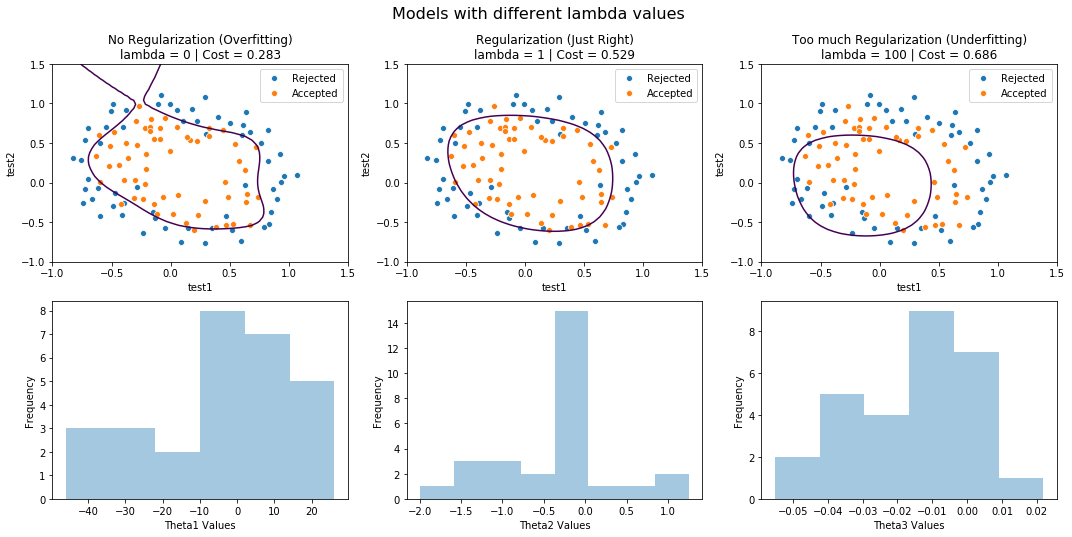

In [25]:
degree=6
lmbdas=[0,1,100]
alphas=[10,0.03,0.03]
iterations=[40000,10000,10000]

labels=['No Regularization (Overfitting)','Regularization (Just Right)','Too much Regularization (Underfitting)']

nrows,ncols=2,3
fig,ax=plt.subplots(nrows,ncols,figsize=(18,8))
fig.suptitle('Models with different lambda values',size=16)

for i in range(ncols):
    X=mapFeature(data['test1'],data['test2'],degree)
    y=data.values[:,2]
    y=y[:,np.newaxis]
    theta=np.zeros(shape=(1,X.shape[1]))
    theta,jHistory=regularizedGradientDescent(X,y,theta,alphas[i],lmbdas[i],iterations[i])
    axis1=ax[0][i]
    axis1.set_title(f'{labels[i]}\nlambda = {lmbdas[i]} | Cost = {jHistory[iterations[i]-1]:.3f}')
    plotDecisionBoundary(theta,data,y,axis1)
    axis2=ax[1][i]
    c=sns.distplot(theta[0],ax=axis2,kde=False)
    c.set(xlabel=f'Theta{i+1} Values',ylabel='Frequency')

<img src='https://memegenerator.net/img/instances/55349650.jpg' width='300' height='300'>